一、基础概念(需要知晓的内容)

机器学习：大致就是人给机器输入一大堆清洗后的数据，机器经过某些算法输出结果。这些算法就是机器学习某些规律的过程。  

1）监督学习：需要对数据打标签   

2）无监督学习：不需要对数据打标签  

3）自监督学习：利用没标签的数据生成有标签的数据  

4）半监督学习：处理一部分已标记的数据  

5）强化学习：给奖励让智能体学习  


过拟合：机器学太过了。模型相对于训练数据的数量和噪声过于复杂
1）选择参数较少的模型
2）收集更多训练数据集
3）减少训练数据中的噪声


欠拟合：机器学太少了。模型对于训练数据集的拟合不够好
1）选择具有更多参数的模型
2）为学习算法提供更好特征
3）减少对模型的约束

训练集：机器用来学习规律的数据集  

你通过参考答案寻找某类数学题的做题依据

验证集：机器用来测试自己学习到的规律的数据集  

你找到了做题依据并在练习册上进行练习

测试集：机器用来最终评估的全新数据集  

老师给你一张试卷让你巩固这类数学题

划分训练集和测试集的常见比例  
仅划分训练集和测试集 (基础版)  

1）小数据集 70-80%：20-30% （小于一万）  

2）中等数据集 80-90%：10-20% （一万--十万）  

3）大数据集 9:1

超参数：人为设定（算法寻优）的模型设定

二、性能指标

均方根误差（RMSE）：$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}$  

回归问题中的性能度量。即系统在预测中通常会产生多大的误差，并为较大误差赋予较高权重。对异常值更加敏感

平均绝对误差（MAE）：$MAE = 1/n * ∑|yi - yi^| $   
交叉验证进行评估（不表1）

三、一个简单示例:糖尿病人

这个数据集是 sklearn 中经典的回归任务数据集，由 Efron 等人在 2004 年整理发布，用于预测糖尿病患者发病一年后的疾病进展情况，是入门回归算法的首选数据集之一

这 10 个特征均经过均值中心化、标准差缩放

标准化完成：所有特征已做归一化，避免因量纲差异影响回归算法

任务目标：预测连续的病情进展（回归任务）

In [9]:
#加载sklearn内置数据集
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  
# plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 适配Mac
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [ ]:
diabetes=load_diabetes()
print(diabetes.keys())
df = pd.DataFrame(
    data=diabetes.data, 
    columns=diabetes.feature_names  
)
#补充target列
df['target'] = diabetes.target
df.head()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


输入特征：各种特征  

age：年龄  

sex：性别（编码为数值，无直接的 “男 / 女” 对应，仅为分类数值）  

bmi：体重指数（Body Mass Index）  

bp：平均血压（Blood Pressure）  

s1-s6：6 个血清生化指标（如血糖、胰岛素、血脂等，未公开具体对应关系）  


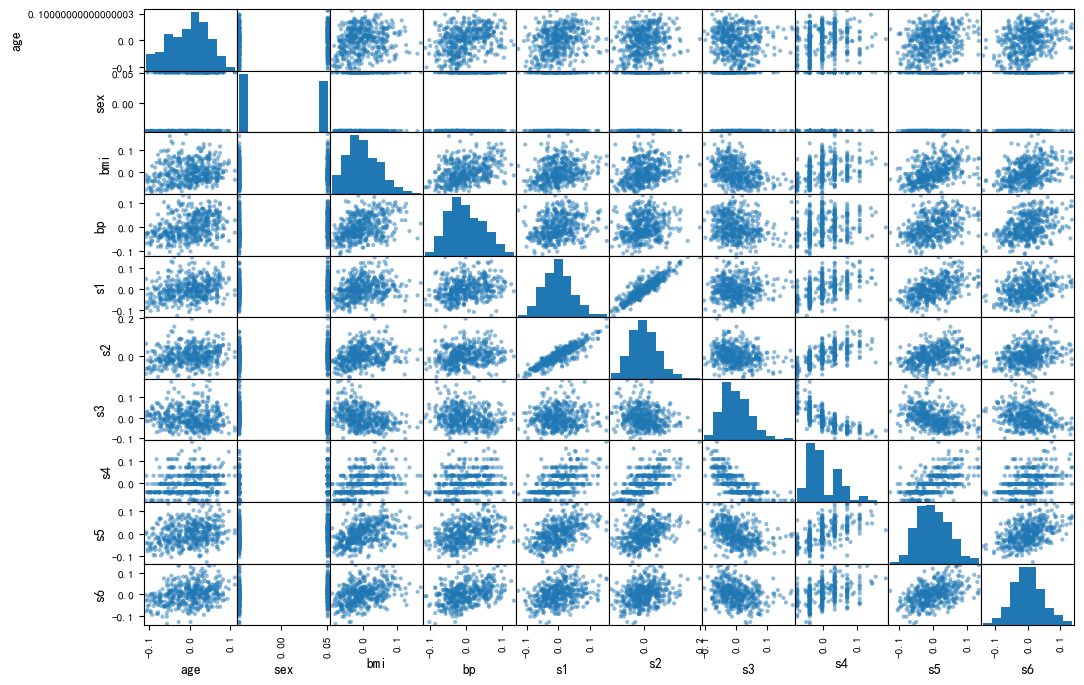

In [11]:
#查看相关性
from pandas.plotting import scatter_matrix
attributes = ["age","sex","bmi", "bp", "s1", "s2", "s3", "s4", "s5", "s6"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()


输出目标：target

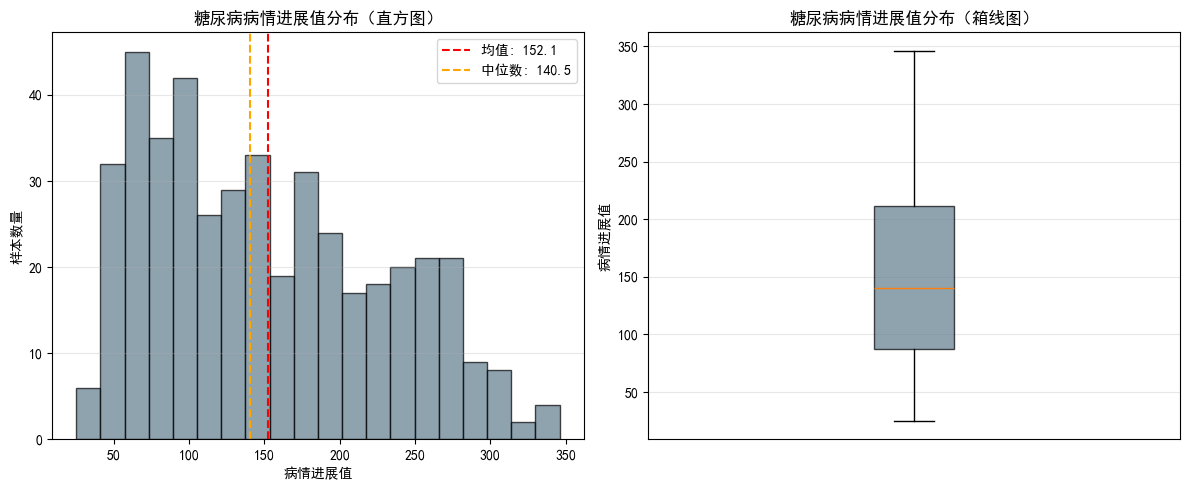

In [13]:
target = df['target']
#可视化
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  
# 直方图（看分布趋势）
ax1.hist(target, bins=20, color='#607c8e', edgecolor='black', alpha=0.7)
ax1.set_title('糖尿病病情进展值分布（直方图）', fontsize=12)
ax1.set_xlabel('病情进展值', fontsize=10)
ax1.set_ylabel('样本数量', fontsize=10)
ax1.grid(axis='y', alpha=0.3)  

# 箱线图（看中位数、四分位数、异常值）
ax2.boxplot(target, patch_artist=True, boxprops={'facecolor': '#607c8e', 'alpha': 0.7})
ax2.set_title('糖尿病病情进展值分布（箱线图）', fontsize=12)
ax2.set_ylabel('病情进展值', fontsize=10)
ax2.set_xticks([]) 
ax2.grid(axis='y', alpha=0.3)

median = target.median() if hasattr(target, 'median') else np.median(target)
mean = target.mean() if hasattr(target, 'mean') else np.mean(target)
ax1.axvline(mean, color='red', linestyle='--', label=f'均值: {mean:.1f}')
ax1.axvline(median, color='orange', linestyle='--', label=f'中位数: {median:.1f}')
ax1.legend()

plt.tight_layout()
plt.show()



原数据集未对target做标准化处理

In [19]:
from sklearn.preprocessing import StandardScaler
#对target列进行标准化
scaler = StandardScaler()
scaler.fit(df[['target']])
df['target'] = scaler.transform(df[['target']])
print(df['target'].head())
df.head()


0   -0.014719
1   -1.001659
2   -0.144580
3    0.699513
4   -0.222496
Name: target, dtype: float64


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,-0.014719
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,-1.001659
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,-0.144580
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,0.699513
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,-0.222496


In [22]:
#划分数据集
from sklearn.model_selection import train_test_split

X=df.drop('target', axis=1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression #线性回归模型
from sklearn.metrics import mean_squared_error, r2_score #性能指标

model=LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"\n测试集 MSE：{mse:.2f}，R²：{r2:.2f}")


测试集 MSE：0.49，R²：0.45


如上只是一个简单的任务，但可以对这个简单任务做一些探讨：

1）哪些特征影响最大  

线性回归的系数代表特征对目标的影响程度，系数绝对值越大，影响越强； 


正负号代表 “正 / 负相关

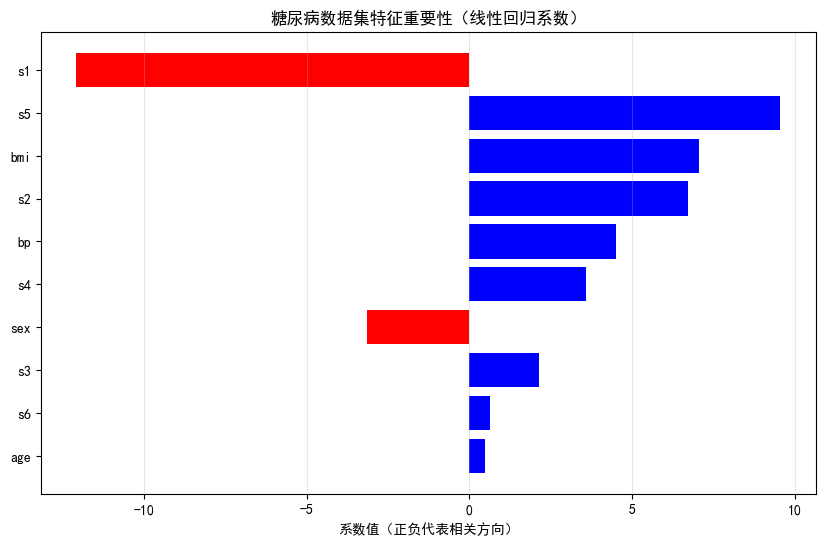

In [25]:
#对应特征名称
feature_names = diabetes.feature_names
coef = model.coef_

# 按系数绝对值排序
sorted_idx = np.argsort(np.abs(coef))
sorted_names = [feature_names[i] for i in sorted_idx]
sorted_coef = [coef[i] for i in sorted_idx]

#可视化
plt.figure(figsize=(10, 6))
plt.barh(sorted_names, sorted_coef, color=['red' if c < 0 else 'blue' for c in sorted_coef])
plt.xlabel('系数值（正负代表相关方向）')
plt.title('糖尿病数据集特征重要性（线性回归系数）')
plt.grid(axis='x', alpha=0.3)
plt.show()


2）分析模型误差

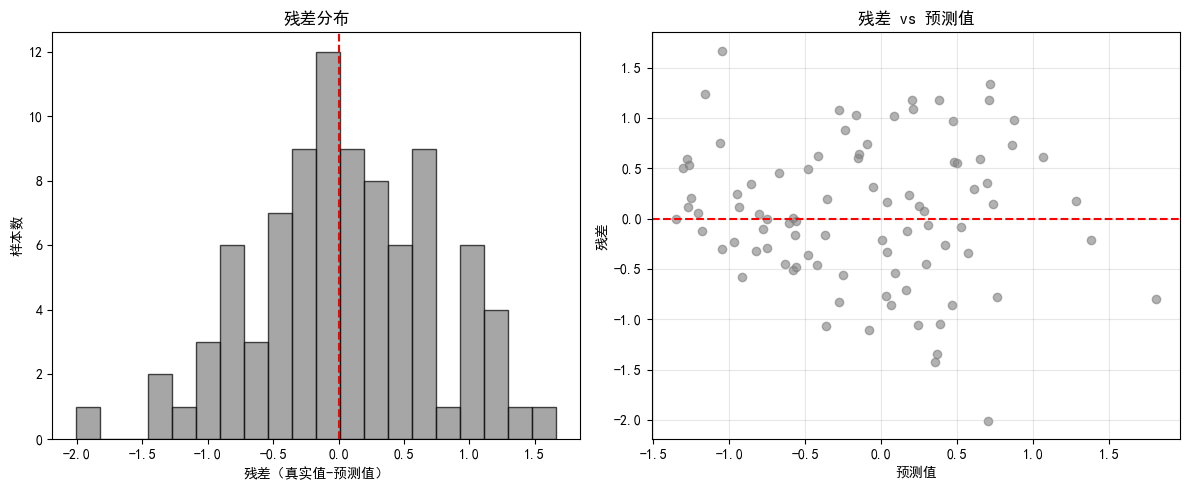

残差均值：0.05
残差标准差：0.70


In [27]:
#计算残差
y_pred=model.predict(X_test)
residuals=y_test - y_pred

# 残差分布直方图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(residuals, bins=20, color='gray', alpha=0.7, edgecolor='black')
ax1.axvline(0, color='red', linestyle='--')
ax1.set_xlabel('残差（真实值-预测值）')
ax1.set_ylabel('样本数')
ax1.set_title('残差分布')

# 残差vs预测值
ax2.scatter(y_pred, residuals, alpha=0.6, color='gray')
ax2.axhline(0, color='red', linestyle='--')
ax2.set_xlabel('预测值')
ax2.set_ylabel('残差')
ax2.set_title('残差 vs 预测值')
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 计算残差统计
print(f"残差均值：{np.mean(residuals):.2f}")
print(f"残差标准差：{np.std(residuals):.2f}")


残差分布直方图中：  
残差整体近似正太分布，说明模型的误差没有系统性偏差，这是线性回归  
残差分布的峰值略向左偏，且右侧有少量高值残差，说明对部分高预测值的样本，模型可能存在轻微的低估，但整体偏差很小  
残差与预测值散点图：  
残差的波动范围没有随预测值增大而明显变化（即没有 “喇叭口” 或 “漏斗形”），满足线性回归的 “同方差性” 假设，说明模型在不同预测值区间的误差稳定性一致  
残差在红色虚线（y=0）上下随机分布，没有明显的规律（如 U 型、递增 / 递减趋势），说明模型捕捉了数据中的线性关系，没有遗漏显著的非线性模式

可是R方的值为0.45.说明该线性回归模型仅能解释糖尿病病情进展值中 45% 的变异。剩下 55% 的变异由模型未包含的因素决定，比如生活习惯、用药情况、基因差异等，这些信息没有在现有的 10 个特征中体现  

3）对比不同划分比例的影响：数据集合的划分会不会对结果有影响

测试集比例0.1 → R²：0.55
测试集比例0.2 → R²：0.45
测试集比例0.3 → R²：0.48
测试集比例0.4 → R²：0.52


c:\Users\23017\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


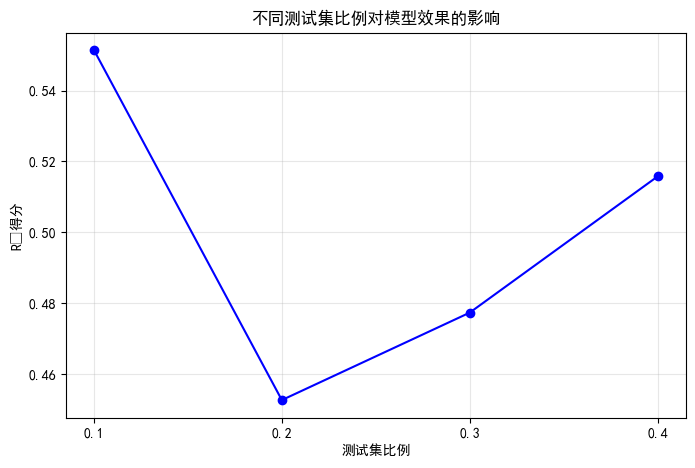

In [28]:
# 测试不同测试集比例
test_sizes = [0.1, 0.2, 0.3, 0.4]
r2_scores = []

for ts in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    r2 = model.score(X_test, y_test)
    r2_scores.append(r2)
    print(f"测试集比例{ts} → R²：{r2:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(test_sizes, r2_scores, marker='o', linestyle='-', color='blue')
plt.xlabel('测试集比例')
plt.ylabel('R²得分')
plt.title('不同测试集比例对模型效果的影响')
plt.grid(alpha=0.3)
plt.xticks(test_sizes)
plt.show()

测试集比例 0.1 → 0.2：R² 得分从约 0.55 快速下降到约 0.45，降幅明显  

这是因为测试集比例为 0.1 时，训练集占比 90%（约 398 个样本），模型能学到更多数据规律；而当测试集比例提升到 0.2 时，训练集缩小到约 354 个样本，小样本量导致模型学习的信息不足，泛化能力下降

测试集比例 0.2 → 0.4：R² 得分从约 0.45 逐步回升到约 0.51，呈现上升趋势  

这一阶段测试集样本量增加（从 89 个到 177 个），评估结果的稳定性提升，得分回升反映了测试集更具代表性，能更真实地反映模型的泛化能力。

核心原因：  
1）训练集规模的影响：  

糖尿病数据集属于小样本，当训练集占比过高（如 90%），模型在训练集上的拟合度较好，但测试集样本太少（仅 44 个），评估结果存在随机性，容易高估模型性能  
2）测试集规模影响：  

当测试集比例过低时，样本量不足导致评估结果波动大；随着测试集比例增加，样本量提升，评估结果更稳定，能更准确反映模型的真实泛化能力  

3）小数据集的固有问题：  

小数据集的划分比例对评估结果影响显著，没有一个 “绝对最优” 的比例，这也是小数据集更适合用交叉验证替代固定划分的原因。